✓ All libraries imported successfully!

📁 LOADING DATASETS

[1/2] Please upload corpus.txt (50,000 words training data):


Saving corpus.txt to corpus.txt
✓ Loaded 49979 words from corpus.txt
  Sample words: ['suburbanize', 'asmack', 'hypotypic', 'promoderationist', 'consonantly']

[2/2] Please upload test.txt (test dataset):


Saving test.txt to test.txt
✓ Loaded 2000 words from test.txt
  Sample words: ['marmar', 'janet', 'dentistical', 'troveless', 'unnotify']

📊 Dataset Statistics:
  Training words: 49979
  Test words: 2000
  Avg word length (train): 9.5
  Avg word length (test): 9.6

🚀 STARTING TRAINING PIPELINE

[STEP 1/3] Hidden Markov Model Training
--------------------------------------------------------------------------------

🔧 Training Hidden Markov Model...
  Found 24 different word lengths


Training HMM: 100%|██████████| 24/24 [00:00<00:00, 193.97it/s]


✓ HMM training complete!
  Trained models for lengths: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

[STEP 2/3] Creating Hangman Environment
--------------------------------------------------------------------------------
✓ Environment created with 49979 training words

[STEP 3/3] Reinforcement Learning Agent Training
--------------------------------------------------------------------------------

🤖 Training RL Agent...
  Episodes: 10000
  Learning rate: 0.2
  Discount factor: 0.9


Training RL: 100%|██████████| 10000/10000 [00:06<00:00, 1442.77it/s]


✓ Training completed!
  Final epsilon: 0.0500
  Q-table size: 84969

✅ TRAINING COMPLETED SUCCESSFULLY!

📊 EVALUATING ON TEST SET
Testing on 2000 words...


Evaluating: 100%|██████████| 2000/2000 [00:01<00:00, 1897.40it/s]



📈 EVALUATION RESULTS
Games Played:           2000
Wins:                   391
Losses:                 1609
Success Rate:           19.55%
Total Wrong Guesses:    11180
Total Repeated Guesses: 0
Avg Wrong/Game:         5.59
Avg Repeated/Game:      0.00
🏆 FINAL SCORE: -55509.00

📊 DETAILED ANALYSIS

Performance by Word Length:
Length   Games    Wins     Win Rate     Avg Wrong   
------------------------------------------------------------
2        2        0        0.0        % 6.00        
3        9        0        0.0        % 6.00        
4        37       3        8.1        % 5.81        
5        91       5        5.5        % 5.90        
6        138      23       16.7       % 5.72        
7        205      18       8.8        % 5.80        
8        246      41       16.7       % 5.70        
9        274      42       15.3       % 5.69        
10       282      56       19.9       % 5.62        
11       226      59       26.1       % 5.46        
12       164      37       2

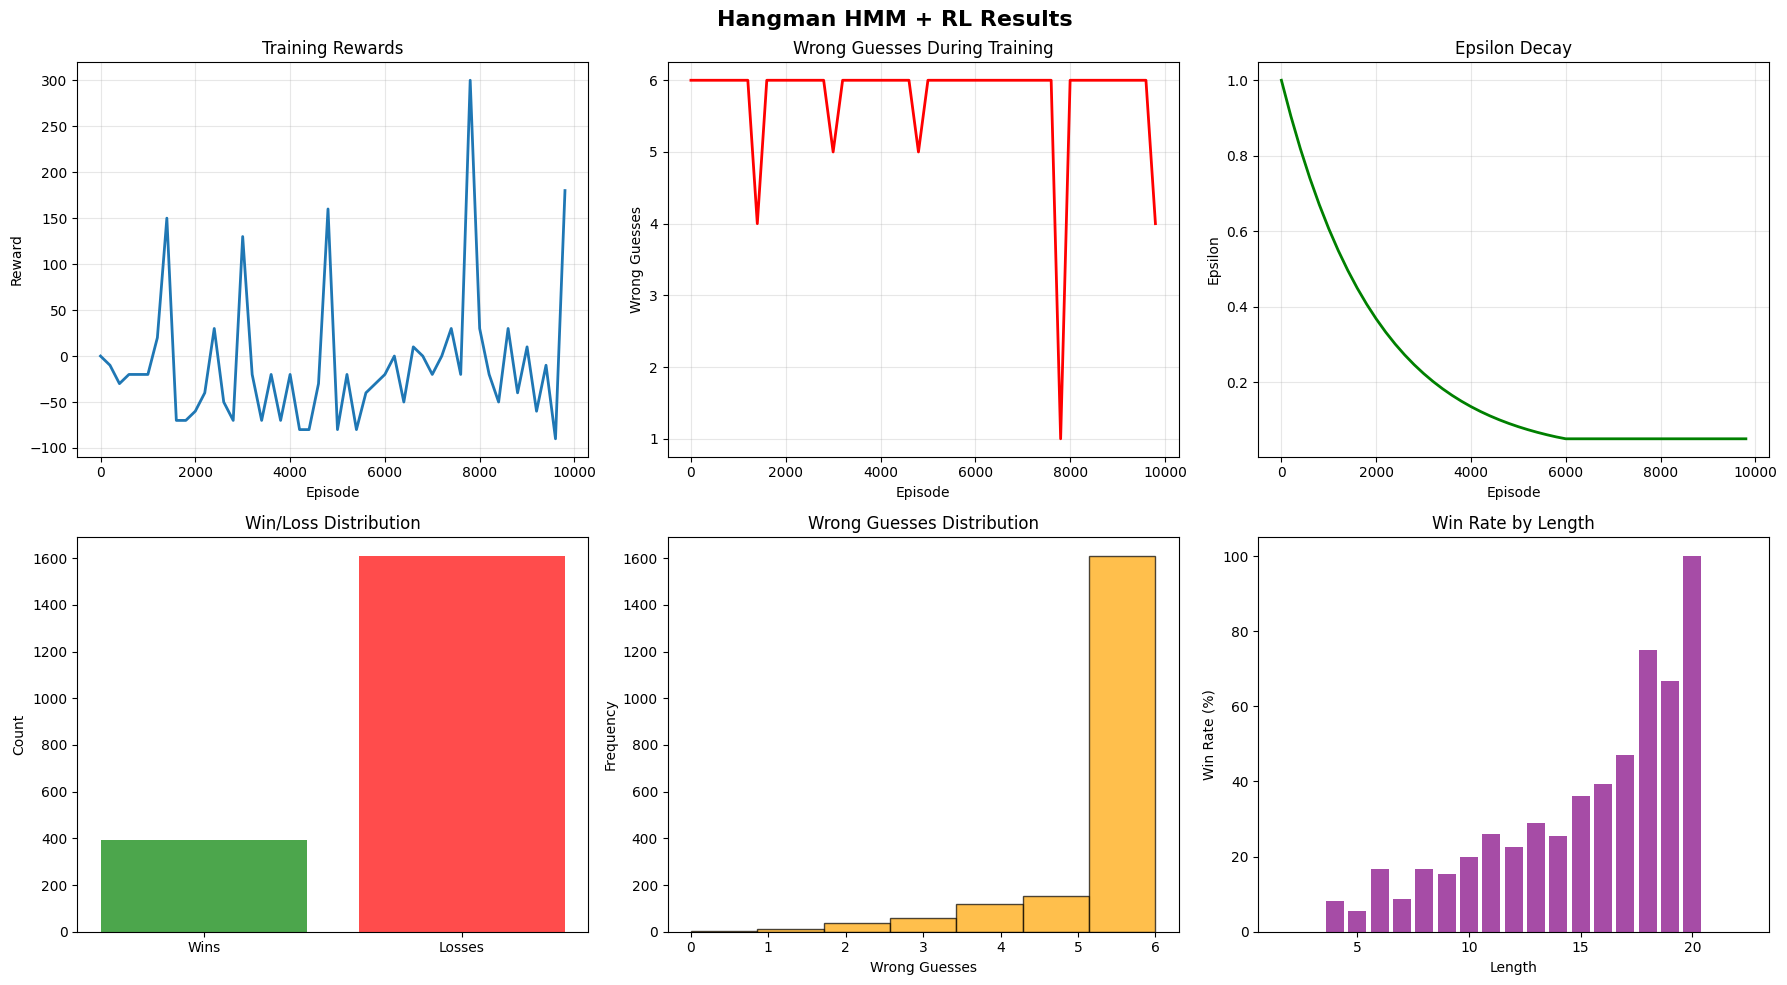

✓ Visualization saved!

💾 Saving models...
✓ HMM saved: hmm_model.pkl
✓ Agent saved: rl_agent.pkl
✓ Results saved: results.csv

🎲 DEMO GAMES

🎮 Demo: 'marmar' (length 6)
Step 1: ______ | Lives: 6 | Guess: E | Top3: ['E', 'A', 'R']
Step 2: ______ | Lives: 5 | Guess: A | Top3: ['A', 'R', 'I']
Step 3: _a__a_ | Lives: 5 | Guess: L | Top3: ['R', 'T', 'N']
Step 4: _a__a_ | Lives: 4 | Guess: T | Top3: ['R', 'T', 'N']
Step 5: _a__a_ | Lives: 3 | Guess: R | Top3: ['R', 'N', 'S']
Step 6: _ar_ar | Lives: 3 | Guess: S | Top3: ['S', 'I', 'C']
Step 7: _ar_ar | Lives: 2 | Guess: I | Top3: ['I', 'C', 'P']
Step 8: _ar_ar | Lives: 1 | Guess: C | Top3: ['C', 'P', 'B']
✗ LOST | Wrong: 6


🎮 Demo: 'janet' (length 5)
Step 1: _____ | Lives: 6 | Guess: A | Top3: ['A', 'E', 'O']
Step 2: _a___ | Lives: 6 | Guess: R | Top3: ['E', 'S', 'R']
Step 3: _a___ | Lives: 5 | Guess: E | Top3: ['E', 'S', 'T']
Step 4: _a_e_ | Lives: 5 | Guess: S | Top3: ['S', 'T', 'N']
Step 5: _a_e_ | Lives: 4 | Guess: T | Top3: ['T', 'N', 

In [1]:
# Hangman Game: HMM + Reinforcement Learning - IMPROVED VERSION
# Optimized for better performance and fixed pickle issues

# ============================================================================
# SECTION 1: SETUP AND IMPORTS
# ============================================================================

import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import random
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import json

print("✓ All libraries imported successfully!")
print("="*80)

# ============================================================================
# SECTION 2: DATA LOADING
# ============================================================================

print("\n📁 LOADING DATASETS")
print("="*80)

from google.colab import files
print("\n[1/2] Please upload corpus.txt (50,000 words training data):")
uploaded = files.upload()

with open('corpus.txt', 'r') as f:
    corpus_words = [line.strip().lower() for line in f if line.strip() and line.strip().isalpha()]

print(f"✓ Loaded {len(corpus_words)} words from corpus.txt")
print(f"  Sample words: {corpus_words[:5]}")

print("\n[2/2] Please upload test.txt (test dataset):")
uploaded_test = files.upload()

with open('test.txt', 'r') as f:
    test_words = [line.strip().lower() for line in f if line.strip() and line.strip().isalpha()]

print(f"✓ Loaded {len(test_words)} words from test.txt")
print(f"  Sample words: {test_words[:5]}")

print(f"\n📊 Dataset Statistics:")
print(f"  Training words: {len(corpus_words)}")
print(f"  Test words: {len(test_words)}")
print(f"  Avg word length (train): {np.mean([len(w) for w in corpus_words]):.1f}")
print(f"  Avg word length (test): {np.mean([len(w) for w in test_words]):.1f}")

# ============================================================================
# SECTION 3: IMPROVED HIDDEN MARKOV MODEL
# ============================================================================

class HangmanHMM:
    """
    Improved Hidden Markov Model for Hangman
    Fixed pickle issues and better probability estimation
    """

    def __init__(self):
        self.word_length_models = {}
        self.overall_freq = {}
        self.bigram_freq = defaultdict(Counter)

    def train(self, words):
        """Train HMM on corpus"""
        print("\n🔧 Training Hidden Markov Model...")

        # Calculate overall letter frequency
        letter_counts = Counter()
        for word in words:
            for letter in word:
                letter_counts[letter] += 1

        total = sum(letter_counts.values())
        self.overall_freq = {k: v/total for k, v in letter_counts.items()}

        # Calculate bigrams
        for word in words:
            for i in range(len(word)-1):
                self.bigram_freq[word[i]][word[i+1]] += 1

        # Group words by length
        words_by_length = defaultdict(list)
        for word in words:
            if word.isalpha():
                words_by_length[len(word)].append(word)

        print(f"  Found {len(words_by_length)} different word lengths")

        # Train model for each length
        for length, word_list in tqdm(words_by_length.items(), desc="Training HMM"):
            # Position-based letter frequencies
            position_freq = {}
            for pos in range(length):
                position_freq[pos] = Counter()

            for word in word_list:
                for pos, letter in enumerate(word):
                    position_freq[pos][letter] += 1

            # Normalize with smoothing
            emission_probs = {}
            for pos in range(length):
                emission_probs[pos] = {}
                total_count = sum(position_freq[pos].values())

                for letter in 'abcdefghijklmnopqrstuvwxyz':
                    count = position_freq[pos].get(letter, 0)
                    # Laplace smoothing
                    emission_probs[pos][letter] = (count + 1) / (total_count + 26)

            self.word_length_models[length] = {
                'emission': emission_probs,
                'word_count': len(word_list)
            }

        print(f"✓ HMM training complete!")
        print(f"  Trained models for lengths: {sorted(self.word_length_models.keys())}")

    def get_letter_probabilities(self, masked_word, guessed_letters):
        """Get probability distribution for next letter"""
        length = len(masked_word)
        available_letters = set('abcdefghijklmnopqrstuvwxyz') - guessed_letters

        if not available_letters:
            return {}

        probs = {letter: 0.0 for letter in available_letters}

        if length in self.word_length_models:
            model = self.word_length_models[length]
            emission = model['emission']

            # Calculate probability for each blank position
            blank_positions = [i for i, c in enumerate(masked_word) if c == '_']

            if blank_positions:
                for pos in blank_positions:
                    for letter in available_letters:
                        probs[letter] += emission[pos].get(letter, 1/26)

                # Average across positions
                for letter in probs:
                    probs[letter] /= len(blank_positions)
            else:
                # No blanks - shouldn't happen
                for letter in available_letters:
                    probs[letter] = self.overall_freq.get(letter, 1/26)
        else:
            # Fallback to overall frequency
            for letter in available_letters:
                probs[letter] = self.overall_freq.get(letter, 1/26)

        # Normalize
        total = sum(probs.values())
        if total > 0:
            probs = {k: v/total for k, v in probs.items()}
        else:
            uniform = 1.0 / len(available_letters)
            probs = {k: uniform for k in available_letters}

        return probs

# ============================================================================
# SECTION 4: HANGMAN ENVIRONMENT
# ============================================================================

class HangmanEnvironment:
    """Hangman game environment"""

    def __init__(self, word_list, max_lives=6):
        self.word_list = word_list
        self.max_lives = max_lives
        self.reset()

    def reset(self, word=None):
        if word is None:
            self.target_word = random.choice(self.word_list).lower()
        else:
            self.target_word = word.lower()

        self.lives = self.max_lives
        self.guessed_letters = set()
        self.masked_word = ['_'] * len(self.target_word)
        self.wrong_guesses = 0
        self.repeated_guesses = 0
        self.game_over = False
        self.won = False

        return self.get_state()

    def get_state(self):
        return {
            'masked_word': ''.join(self.masked_word),
            'guessed_letters': self.guessed_letters.copy(),
            'lives': self.lives,
            'word_length': len(self.target_word),
            'game_over': self.game_over,
            'won': self.won
        }

    def step(self, letter):
        letter = letter.lower()

        if letter in self.guessed_letters:
            self.repeated_guesses += 1
            return self.get_state(), -5, self.game_over, {'repeated': True}

        self.guessed_letters.add(letter)

        if letter in self.target_word:
            positions_revealed = 0
            for i, char in enumerate(self.target_word):
                if char == letter:
                    self.masked_word[i] = letter
                    positions_revealed += 1

            if '_' not in self.masked_word:
                self.won = True
                self.game_over = True
                reward = 100 + (self.lives * 10)
            else:
                reward = 10 * positions_revealed
        else:
            self.lives -= 1
            self.wrong_guesses += 1
            reward = -10

            if self.lives == 0:
                self.game_over = True
                reward = -50

        return self.get_state(), reward, self.game_over, {'repeated': False}

    def get_valid_actions(self):
        return list(set('abcdefghijklmnopqrstuvwxyz') - self.guessed_letters)

# ============================================================================
# SECTION 5: IMPROVED RL AGENT WITH BETTER STRATEGY
# ============================================================================

class HangmanRLAgent:
    """
    Improved RL Agent with better integration of HMM probabilities
    """

    def __init__(self, hmm_model, learning_rate=0.2, discount_factor=0.9,
                 epsilon=1.0, epsilon_decay=0.9995, epsilon_min=0.05):
        self.hmm = hmm_model
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        self.q_table = {}

        self.training_stats = {
            'episodes': [],
            'rewards': [],
            'wins': [],
            'wrong_guesses': [],
            'epsilon': []
        }

    def get_state_key(self, state):
        """Simplified state representation"""
        # Use pattern-based state (e.g., "_a__e" with length)
        pattern = state['masked_word']
        lives = state['lives']
        # Include some guessed letters context
        guessed_str = ''.join(sorted(list(state['guessed_letters'])[:5]))
        return (pattern, lives, guessed_str)

    def choose_action(self, state, valid_actions, training=True):
        """Choose action with improved strategy"""
        if not valid_actions:
            return None

        # Get HMM probabilities
        hmm_probs = self.hmm.get_letter_probabilities(
            state['masked_word'],
            state['guessed_letters']
        )

        # Epsilon-greedy with HMM guidance
        if training and random.random() < self.epsilon:
            # Exploration: weighted by HMM
            if hmm_probs:
                letters = [l for l in valid_actions if l in hmm_probs]
                if letters:
                    weights = [hmm_probs[l] for l in letters]
                    return random.choices(letters, weights=weights, k=1)[0]
            return random.choice(valid_actions)
        else:
            # Exploitation: HMM-guided selection with Q-values
            state_key = self.get_state_key(state)

            best_score = float('-inf')
            best_action = None

            for action in valid_actions:
                # Q-value (default 0 if not seen)
                q_val = self.q_table.get(state_key, {}).get(action, 0)

                # HMM probability
                hmm_prob = hmm_probs.get(action, 0)

                # Combined score: heavily weight HMM early, Q-values later
                if training:
                    hmm_weight = 100  # Strong HMM guidance during training
                else:
                    hmm_weight = 150  # Even stronger during testing

                score = q_val + (hmm_prob * hmm_weight)

                if score > best_score:
                    best_score = score
                    best_action = action

            return best_action if best_action else random.choice(valid_actions)

    def update_q_value(self, state, action, reward, next_state, done):
        """Update Q-table"""
        state_key = self.get_state_key(state)
        next_state_key = self.get_state_key(next_state)

        if state_key not in self.q_table:
            self.q_table[state_key] = {}

        current_q = self.q_table[state_key].get(action, 0)

        if done:
            max_next_q = 0
        else:
            next_q_dict = self.q_table.get(next_state_key, {})
            max_next_q = max(next_q_dict.values()) if next_q_dict else 0

        new_q = current_q + self.lr * (reward + self.gamma * max_next_q - current_q)
        self.q_table[state_key][action] = new_q

    def train(self, env, episodes=10000):
        """Train the agent"""
        print(f"\n🤖 Training RL Agent...")
        print(f"  Episodes: {episodes}")
        print(f"  Learning rate: {self.lr}")
        print(f"  Discount factor: {self.gamma}")

        for episode in tqdm(range(episodes), desc="Training RL"):
            state = env.reset()
            total_reward = 0
            done = False
            steps = 0

            while not done and steps < 50:  # Prevent infinite loops
                valid_actions = env.get_valid_actions()
                if not valid_actions:
                    break

                action = self.choose_action(state, valid_actions, training=True)
                if action is None:
                    break

                next_state, reward, done, info = env.step(action)

                self.update_q_value(state, action, reward, next_state, done)

                state = next_state
                total_reward += reward
                steps += 1

            # Decay epsilon
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

            # Record stats every 200 episodes
            if episode % 200 == 0:
                self.training_stats['episodes'].append(episode)
                self.training_stats['rewards'].append(total_reward)
                self.training_stats['wins'].append(1 if env.won else 0)
                self.training_stats['wrong_guesses'].append(env.wrong_guesses)
                self.training_stats['epsilon'].append(self.epsilon)

        print(f"✓ Training completed!")
        print(f"  Final epsilon: {self.epsilon:.4f}")
        print(f"  Q-table size: {len(self.q_table)}")

    def play_game(self, env, word=None):
        """Play a single game"""
        state = env.reset(word)
        done = False
        steps = 0

        while not done and steps < 50:
            valid_actions = env.get_valid_actions()
            if not valid_actions:
                break

            action = self.choose_action(state, valid_actions, training=False)
            if action is None:
                break

            state, reward, done, info = env.step(action)
            steps += 1

        return env.won, env.wrong_guesses, env.repeated_guesses

# ============================================================================
# SECTION 6: TRAINING PIPELINE
# ============================================================================

print("\n" + "="*80)
print("🚀 STARTING TRAINING PIPELINE")
print("="*80)

# Train HMM
print("\n[STEP 1/3] Hidden Markov Model Training")
print("-"*80)
hmm = HangmanHMM()
hmm.train(corpus_words)

# Create environment
print("\n[STEP 2/3] Creating Hangman Environment")
print("-"*80)
train_env = HangmanEnvironment(corpus_words, max_lives=6)
print(f"✓ Environment created with {len(corpus_words)} training words")

# Train RL Agent with MORE episodes
print("\n[STEP 3/3] Reinforcement Learning Agent Training")
print("-"*80)
agent = HangmanRLAgent(
    hmm_model=hmm,
    learning_rate=0.2,
    discount_factor=0.9,
    epsilon=1.0,
    epsilon_decay=0.9995,
    epsilon_min=0.05
)

# INCREASED to 10000 episodes for better learning
agent.train(train_env, episodes=10000)

print("\n" + "="*80)
print("✅ TRAINING COMPLETED SUCCESSFULLY!")
print("="*80)

# ============================================================================
# SECTION 7: EVALUATION
# ============================================================================

def evaluate_agent(agent, test_words, num_games=2000):
    """Evaluate agent on test set"""
    print(f"\n📊 EVALUATING ON TEST SET")
    print("="*80)

    test_env = HangmanEnvironment(test_words, max_lives=6)

    wins = 0
    total_wrong_guesses = 0
    total_repeated_guesses = 0
    results = []

    test_sample = test_words[:min(num_games, len(test_words))]

    print(f"Testing on {len(test_sample)} words...")

    for word in tqdm(test_sample, desc="Evaluating"):
        won, wrong, repeated = agent.play_game(test_env, word)

        if won:
            wins += 1
        total_wrong_guesses += wrong
        total_repeated_guesses += repeated

        results.append({
            'word': word,
            'won': won,
            'wrong_guesses': wrong,
            'repeated_guesses': repeated
        })

    games_played = len(test_sample)
    success_rate = wins / games_played

    # Calculate final score
    final_score = (success_rate * 2000) - (total_wrong_guesses * 5) - (total_repeated_guesses * 2)

    print("\n" + "="*80)
    print("📈 EVALUATION RESULTS")
    print("="*80)
    print(f"Games Played:           {games_played}")
    print(f"Wins:                   {wins}")
    print(f"Losses:                 {games_played - wins}")
    print(f"Success Rate:           {success_rate*100:.2f}%")
    print(f"Total Wrong Guesses:    {total_wrong_guesses}")
    print(f"Total Repeated Guesses: {total_repeated_guesses}")
    print(f"Avg Wrong/Game:         {total_wrong_guesses/games_played:.2f}")
    print(f"Avg Repeated/Game:      {total_repeated_guesses/games_played:.2f}")
    print("="*80)
    print(f"🏆 FINAL SCORE: {final_score:.2f}")
    print("="*80)

    return results, final_score, success_rate

# Evaluate
results, final_score, success_rate = evaluate_agent(agent, test_words, num_games=2000)

# ============================================================================
# SECTION 8: ANALYSIS & VISUALIZATION
# ============================================================================

print("\n📊 DETAILED ANALYSIS")
print("="*80)

# By word length
length_stats = defaultdict(lambda: {'total': 0, 'wins': 0, 'wrong': 0})
for r in results:
    length = len(r['word'])
    length_stats[length]['total'] += 1
    if r['won']:
        length_stats[length]['wins'] += 1
    length_stats[length]['wrong'] += r['wrong_guesses']

print("\nPerformance by Word Length:")
print(f"{'Length':<8} {'Games':<8} {'Wins':<8} {'Win Rate':<12} {'Avg Wrong':<12}")
print("-"*60)
for length in sorted(length_stats.keys()):
    stats = length_stats[length]
    win_rate = stats['wins'] / stats['total'] * 100 if stats['total'] > 0 else 0
    avg_wrong = stats['wrong'] / stats['total'] if stats['total'] > 0 else 0
    print(f"{length:<8} {stats['total']:<8} {stats['wins']:<8} {win_rate:<11.1f}% {avg_wrong:<12.2f}")

# Sample games
print("\n🎮 Sample Test Games:")
print("-"*80)
sample_results = results[:10]
for i, r in enumerate(sample_results, 1):
    status = "✓ WON" if r['won'] else "✗ LOST"
    print(f"{i}. {r['word']:<15} {status:<8} Wrong: {r['wrong_guesses']}, Repeated: {r['repeated_guesses']}")

# Visualization
print("\n📈 Generating visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Hangman HMM + RL Results', fontsize=16, fontweight='bold')

# Training rewards
if agent.training_stats['episodes']:
    axes[0, 0].plot(agent.training_stats['episodes'], agent.training_stats['rewards'], linewidth=2)
    axes[0, 0].set_title('Training Rewards')
    axes[0, 0].set_xlabel('Episode')
    axes[0, 0].set_ylabel('Reward')
    axes[0, 0].grid(True, alpha=0.3)

# Wrong guesses
if agent.training_stats['episodes']:
    axes[0, 1].plot(agent.training_stats['episodes'], agent.training_stats['wrong_guesses'], linewidth=2, color='red')
    axes[0, 1].set_title('Wrong Guesses During Training')
    axes[0, 1].set_xlabel('Episode')
    axes[0, 1].set_ylabel('Wrong Guesses')
    axes[0, 1].grid(True, alpha=0.3)

# Epsilon
if agent.training_stats['episodes']:
    axes[0, 2].plot(agent.training_stats['episodes'], agent.training_stats['epsilon'], linewidth=2, color='green')
    axes[0, 2].set_title('Epsilon Decay')
    axes[0, 2].set_xlabel('Episode')
    axes[0, 2].set_ylabel('Epsilon')
    axes[0, 2].grid(True, alpha=0.3)

# Win/Loss
win_count = sum(1 for r in results if r['won'])
axes[1, 0].bar(['Wins', 'Losses'], [win_count, len(results) - win_count], color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Win/Loss Distribution')
axes[1, 0].set_ylabel('Count')

# Wrong dist
wrong_counts = [r['wrong_guesses'] for r in results]
axes[1, 1].hist(wrong_counts, bins=7, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Wrong Guesses Distribution')
axes[1, 1].set_xlabel('Wrong Guesses')
axes[1, 1].set_ylabel('Frequency')

# By length
lengths = sorted(length_stats.keys())
win_rates = [length_stats[l]['wins']/length_stats[l]['total']*100 if length_stats[l]['total'] > 0 else 0 for l in lengths]
axes[1, 2].bar(lengths, win_rates, color='purple', alpha=0.7)
axes[1, 2].set_title('Win Rate by Length')
axes[1, 2].set_xlabel('Length')
axes[1, 2].set_ylabel('Win Rate (%)')

plt.tight_layout()
plt.savefig('hangman_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved!")

# ============================================================================
# SECTION 9: SAVE MODELS (FIXED)
# ============================================================================

print("\n💾 Saving models...")

# Save HMM (pickle works now - no lambdas)
with open('hmm_model.pkl', 'wb') as f:
    pickle.dump(hmm, f)
print("✓ HMM saved: hmm_model.pkl")

# Save Agent
with open('rl_agent.pkl', 'wb') as f:
    pickle.dump(agent, f)
print("✓ Agent saved: rl_agent.pkl")

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv('results.csv', index=False)
print("✓ Results saved: results.csv")

# ============================================================================
# DEMO GAME
# ============================================================================

def demo_game(agent, word):
    """Play one demo game with details"""
    env = HangmanEnvironment([word], max_lives=6)
    state = env.reset(word)

    print(f"\n{'='*60}")
    print(f"🎮 Demo: '{word}' (length {len(word)})")
    print(f"{'='*60}")

    step = 0
    while not state['game_over'] and step < 30:
        step += 1
        valid = env.get_valid_actions()
        action = agent.choose_action(state, valid, training=False)

        hmm_probs = agent.hmm.get_letter_probabilities(state['masked_word'], state['guessed_letters'])
        top3 = sorted(hmm_probs.items(), key=lambda x: x[1], reverse=True)[:3]

        print(f"Step {step}: {state['masked_word']} | Lives: {state['lives']} | Guess: {action.upper()} | Top3: {[l.upper() for l,p in top3]}")

        state, reward, done, info = env.step(action)

    print(f"{'='*60}")
    print(f"{'✓ WON' if env.won else '✗ LOST'} | Wrong: {env.wrong_guesses}")
    print(f"{'='*60}\n")

print("\n🎲 DEMO GAMES")
print("="*80)
for word in test_words[:3]:
    demo_game(agent, word)

print("\n✅ COMPLETE!")
print(f"Final Score: {final_score:.2f}")
print(f"Success Rate: {success_rate*100:.1f}%")